# 업종/테마주 수집

In [1]:
# 라이브러리 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux
        # colab에서는 runtime을 <꼭> 재시작 해야합니다.
        # 런타임을 재시작 하지 않고 폰트 설치를 하면 기본 설정 폰트가 로드되어 한글이 깨집니다.
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null

        import matplotlib.font_manager as fm

        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

In [3]:
font_family = get_font_family()
font_family

'Malgun Gothic'

In [4]:
# 사용가능한 폰트 스타일
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [5]:
# 그래프 스타일 설정
plt.style.use("ggplot")

# 폰트 설정
plt.rc("font", family = font_family)

# 마이너스폰트 설정
plt.rc("axes", unicode_minus = False)

# 그래프에 retina display 적용 (글자를 좀 더 선명하게 하는 옵션)
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

<AxesSubplot:title={'center':'한글'}>

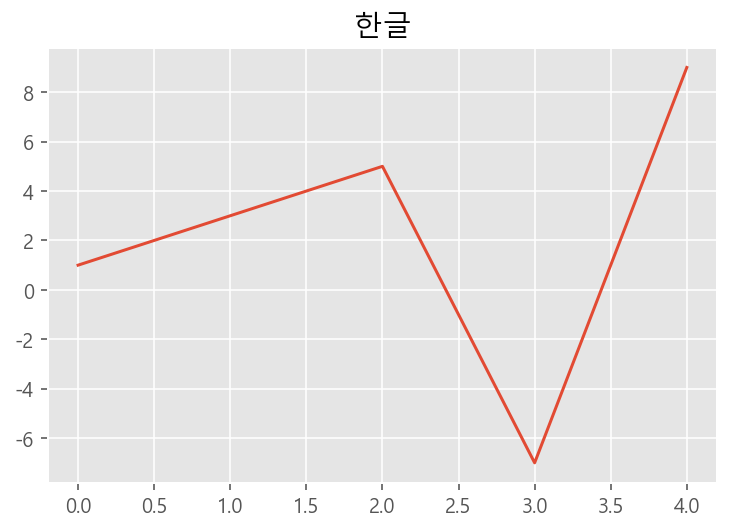

In [6]:
# 한글 폰트 확인
pd.Series([1, 3, 5, -7, 9]).plot(title="한글")

# 자동차 업종 수집

In [7]:
url = 'https://finance.naver.com/sise/sise_group_detail.nhn?type=upjong&no=273'
url

'https://finance.naver.com/sise/sise_group_detail.nhn?type=upjong&no=273'

In [8]:
# read_html 통해 자동차 업종 수집
table = pd.read_html(url, encoding="cp949")
len(table)

3

In [9]:
# 인덱싱 하면서 필요한 정보 찾기
table[0]

업종명    전일대비 전일대비 등락현황                등락그래프
   업종명    전일대비        전체   상승   보합   하락 등락그래프
0  자동차  +0.93%       8.0  4.0  3.0  1.0   13%
1  NaN     NaN       NaN  NaN  NaN  NaN   NaN
2  NaN     NaN       NaN  NaN  NaN  NaN   NaN

In [10]:
table[1]

,0,1,2,3,4,5
0,거래량,매수호가,거래대금(백만),시가총액(억),영업이익(억),PER(배)
1,시가,매도호가,전일거래량,자산총계(억),영업이익증가율,ROE(%)
2,고가,매수총잔량,외국인비율,부채총계(억),당기순이익(억),ROA(%)
3,저가,매도총잔량,상장주식수(천주),매출액(억),주당순이익(원),PBR(배)
4,NaN,NaN,NaN,매출액증가율,보통주배당금(원),유보율(%)


In [11]:
table[2]

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,토론실,Unnamed: 10,Unnamed: 11
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,현대차,242000.0,2500.0,+1.04%,241500.0,242000.0,1025525.0,245133.0,653096.0,NaN,NaN,NaN
2,기아,90500.0,900.0,+1.00%,90400.0,90500.0,2949200.0,263132.0,1532598.0,NaN,NaN,NaN
3,KR모터스,1235.0,10.0,+0.82%,1230.0,1235.0,392724.0,484.0,736527.0,NaN,NaN,NaN
4,엘브이엠씨홀딩스,3780.0,30.0,+0.80%,3780.0,3790.0,848954.0,3269.0,234658.0,NaN,NaN,NaN
5,쌍용차,2770.0,0.0,0.00%,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
6,현대차2우B,115000.0,0.0,0.00%,115000.0,115500.0,95739.0,10950.0,113308.0,NaN,NaN,NaN
7,현대차3우B,109500.0,0.0,0.00%,109000.0,109500.0,10034.0,1087.0,7626.0,NaN,NaN,NaN
8,현대차우,115000.0,500.0,-0.43%,115000.0,115500.0,51425.0,5916.0,42634.0,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# 필요한 테이블을 찾았으면 dropna를 통해 결측치를 제거한다
# axis=0 (행), axis=1(열)
# how='all' 옵션을 주면 전부 결측치인 raw나 colunm을 제거한다
# 행, 열에 있는 결측치 모두 삭제해서 raw라는 새 변수에 넣는다
raw = table[2].dropna(axis=0, how='all').dropna(axis=1, how='all')
raw.shape

(8, 9)

In [13]:
raw.head()

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량
1,현대차,242000.0,2500.0,+1.04%,241500.0,242000.0,1025525.0,245133.0,653096.0
2,기아,90500.0,900.0,+1.00%,90400.0,90500.0,2949200.0,263132.0,1532598.0
3,KR모터스,1235.0,10.0,+0.82%,1230.0,1235.0,392724.0,484.0,736527.0
4,엘브이엠씨홀딩스,3780.0,30.0,+0.80%,3780.0,3790.0,848954.0,3269.0,234658.0
5,쌍용차,2770.0,0.0,0.00%,0.0,0.0,0.0,0.0,0.0


# 파생변수 만들기

In [14]:
# datetime 이용, 조회한 날짜를 DataFrame에 기록
# strftime으로 날짜 포맷 지정
import datetime
today = datetime.datetime.today().strftime('%Y-%m-%d')

In [15]:
# 일자별로 데이터가 다르므로 조회일자 컬럼 추가
raw["조회일자"] = today

In [16]:
# 데이터 확인
raw.head()

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자
1,현대차,242000.0,2500.0,+1.04%,241500.0,242000.0,1025525.0,245133.0,653096.0,2021-07-01
2,기아,90500.0,900.0,+1.00%,90400.0,90500.0,2949200.0,263132.0,1532598.0,2021-07-01
3,KR모터스,1235.0,10.0,+0.82%,1230.0,1235.0,392724.0,484.0,736527.0,2021-07-01
4,엘브이엠씨홀딩스,3780.0,30.0,+0.80%,3780.0,3790.0,848954.0,3269.0,234658.0,2021-07-01
5,쌍용차,2770.0,0.0,0.00%,0.0,0.0,0.0,0.0,0.0,2021-07-01


# 거래량, 거래대금 시각화

<AxesSubplot:ylabel='종목명'>

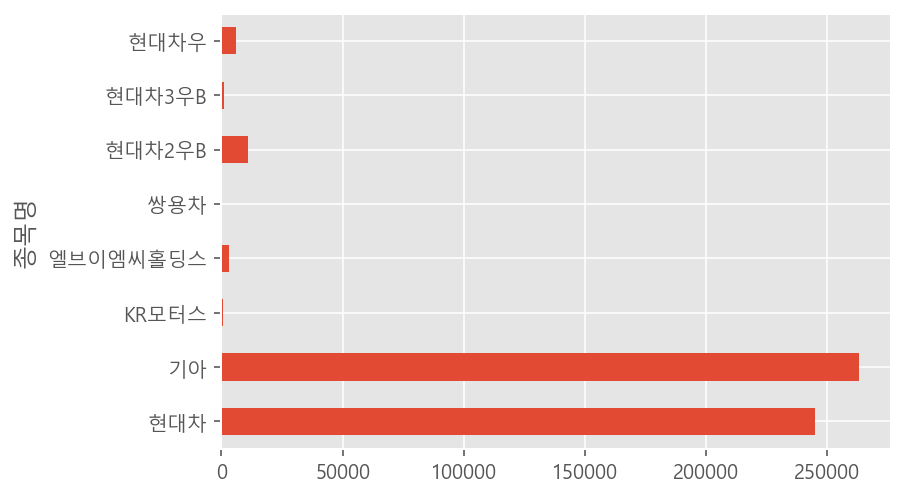

In [17]:
# 종목명 대비 거래량을 bar chart로 그리기
# 종목명을 set_index 해주면 plot에서 y axis label로 그려진다
raw.set_index("종목명")["거래대금"].plot.barh()

# 종목코드 병합
* 종목명을 통해 미리 수집해 두었던 krx 전체 상장 종목 목록을 가져오거나 수집해서 데이터를 병합한다

In [18]:
# raw 변수에 담긴 데이터프레임을 확인
raw

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자
1,현대차,242000.0,2500.0,+1.04%,241500.0,242000.0,1025525.0,245133.0,653096.0,2021-07-01
2,기아,90500.0,900.0,+1.00%,90400.0,90500.0,2949200.0,263132.0,1532598.0,2021-07-01
3,KR모터스,1235.0,10.0,+0.82%,1230.0,1235.0,392724.0,484.0,736527.0,2021-07-01
4,엘브이엠씨홀딩스,3780.0,30.0,+0.80%,3780.0,3790.0,848954.0,3269.0,234658.0,2021-07-01
5,쌍용차,2770.0,0.0,0.00%,0.0,0.0,0.0,0.0,0.0,2021-07-01
6,현대차2우B,115000.0,0.0,0.00%,115000.0,115500.0,95739.0,10950.0,113308.0,2021-07-01
7,현대차3우B,109500.0,0.0,0.00%,109000.0,109500.0,10034.0,1087.0,7626.0,2021-07-01
8,현대차우,115000.0,500.0,-0.43%,115000.0,115500.0,51425.0,5916.0,42634.0,2021-07-01


In [19]:
# FinanceDataReader로 StockListing을 다시 받아서 df_krx라는 변수에 담는다
import FinanceDataReader as fdr
df_krx = fdr.StockListing("KRX")
df_krx.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,박대현,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


# Merge를 통한 종목코드 만들기
* raw와 df_krx의 종목명을 기준으로 종목코드를 병합시킨다
* merge 사용
* concat vs merge
 - concat: axis=1 컬럼 기준으로 인덱스가 같은 값 옆으로 붙여 새로운 컬럼을 만든다, axis=0 행 기준으로 위 아래로 같은 컬럼끼리 값을 이어 붙여 새로운 행을 만든다
 - merge: index 혹은 특정 컬럼값을 기준으로 두 개의 데이터프레임 연결

In [20]:
# 종목코드와 종목명만 사용하기 위해 새 변수를 만든다
df_item_code_name = df_krx[["Symbol", "Name"]]
df_item_code_name.head()

,Symbol,Name
0,060310,3S
1,095570,AJ네트웍스
2,006840,AK홀딩스
3,054620,APS홀딩스
4,265520,AP시스템


In [21]:
# 종목 갯수를 확인하기 위해 행과 열의 수를 체크
raw.shape, df_item_code_name.shape

((8, 10), (7131, 2))

In [22]:
raw.head()

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자
1,현대차,242000.0,2500.0,+1.04%,241500.0,242000.0,1025525.0,245133.0,653096.0,2021-07-01
2,기아,90500.0,900.0,+1.00%,90400.0,90500.0,2949200.0,263132.0,1532598.0,2021-07-01
3,KR모터스,1235.0,10.0,+0.82%,1230.0,1235.0,392724.0,484.0,736527.0,2021-07-01
4,엘브이엠씨홀딩스,3780.0,30.0,+0.80%,3780.0,3790.0,848954.0,3269.0,234658.0,2021-07-01
5,쌍용차,2770.0,0.0,0.00%,0.0,0.0,0.0,0.0,0.0,2021-07-01


In [23]:
# 종목코드를 만들어주기 위해 raw 컬럼을 기준으로 df_item_code_name 프레임과 병합
# pd.merge 사용
df = pd.merge(raw, df_item_code_name, left_on='종목명', right_on='Name')
df

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자,Symbol,Name
0,현대차,242000.0,2500.0,+1.04%,241500.0,242000.0,1025525.0,245133.0,653096.0,2021-07-01,005380,현대차
1,기아,90500.0,900.0,+1.00%,90400.0,90500.0,2949200.0,263132.0,1532598.0,2021-07-01,000270,기아
2,KR모터스,1235.0,10.0,+0.82%,1230.0,1235.0,392724.0,484.0,736527.0,2021-07-01,000040,KR모터스
3,엘브이엠씨홀딩스,3780.0,30.0,+0.80%,3780.0,3790.0,848954.0,3269.0,234658.0,2021-07-01,900140,엘브이엠씨홀딩스
4,쌍용차,2770.0,0.0,0.00%,0.0,0.0,0.0,0.0,0.0,2021-07-01,003620,쌍용차
5,현대차2우B,115000.0,0.0,0.00%,115000.0,115500.0,95739.0,10950.0,113308.0,2021-07-01,005387,현대차2우B
6,현대차3우B,109500.0,0.0,0.00%,109000.0,109500.0,10034.0,1087.0,7626.0,2021-07-01,005389,현대차3우B
7,현대차우,115000.0,500.0,-0.43%,115000.0,115500.0,51425.0,5916.0,42634.0,2021-07-01,005385,현대차우


In [24]:
# 컬럼명 변경
df = df.rename(columns={'Symbol': '종목코드'})
# Name 컬럼은 종목명과 중복되므로 삭제
df = df.drop("Name", axis=1)

In [25]:
# 데이터 확인
df.head(1)

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자,종목코드
0,현대차,242000.0,2500.0,+1.04%,241500.0,242000.0,1025525.0,245133.0,653096.0,2021-07-01,005380


# 종목상세정보 수집

In [26]:
# 전체 종목 수집 전 일부 종목을 먼저 수집
item_code = "000040"
item_name = "KR모터스"

In [27]:
# 종목상세정보를 위한 url 수집
item_url = f"https://finance.naver.com/item/main.nhn?code={item_code}"
print(item_url)

https://finance.naver.com/item/main.nhn?code=000040


In [28]:
# read_html을 이용해 데이터 수집
tables = pd.read_html(item_url, encoding='cp949')
len(tables)

13

In [29]:
# 수집된 데이터들 중 원하는 데이터 찾기
tables[3]

주요재무정보 최근 연간 실적                             최근 분기 실적                  \
       주요재무정보  2018.12  2019.12 2020.12 2021.12(E)  2020.03 2020.06 2020.09   
       주요재무정보   IFRS연결   IFRS연결  IFRS연결     IFRS연결   IFRS연결  IFRS연결  IFRS연결   
0         매출액      366     1326    1178        NaN   286.00  312.00  291.00   
1        영업이익     -163     -247      12        NaN     4.00    8.00    1.00   
2       당기순이익     -244     -410    -115        NaN    -9.00   -2.00  -15.00   
3       영업이익률   -44.46   -18.59    1.03        NaN     1.35    2.42    0.34   
4        순이익률   -66.85   -30.96   -9.75        NaN    -2.98   -0.49   -5.02   
5   ROE(지배주주)   -49.31  -113.29  -29.64        NaN  -127.05  -74.95  -70.69   
6        부채비율   121.62   309.20  212.72        NaN   341.08  171.79  171.47   
7        당좌비율    92.73    43.16   53.41        NaN    42.83   55.08   52.58   
8         유보율   -35.08   -86.23  -35.01        NaN   -48.24  -19.74  -22.36   
9      EPS(원)     -755     -855    -107        NaN   -17.00   -7.00  -13.00   
10     PER(배)    -2.15    -1.06  -10.58        NaN    -0.79   -1.09   -1.70   
11     BPS(원)     1117      392     396        NaN   390.00  459.00  453.00   
12     PBR(배)     1.45     2.31    2.86        NaN     1.54    1.45    1.69   
13   주당배당금(원)        -      NaN       -        NaN      NaN     NaN     NaN   
14   시가배당률(%)        -      NaN       -        NaN      NaN     NaN     NaN   
15    배당성향(%)        -        -       -        NaN      NaN     NaN     NaN   

                               
   2020.12 2021.03 2021.06(E)  
    IFRS연결  IFRS연결     IFRS연결  
0      290  227.00        NaN  
1        -   -9.00        NaN  
2      -90  -21.00        NaN  
3    -0.07   -3.94        NaN  
4   -31.13   -9.23        NaN  
5   -29.64  -29.30        NaN  
6   212.72  212.01        NaN  
7    53.41   50.02        NaN  
8   -35.01  -24.60        NaN  
9      -62  -15.00        NaN  
10  -10.58  -13.22        NaN  
11     396  428.00        NaN  
12    2.86    3.07        NaN  
13     NaN     NaN        NaN  
14     NaN     NaN        NaN  
15     NaN     NaN        NaN

# 컬럼명과 값 형태로 되어 있는 테이블만 사용

In [30]:
# 수집한 정보를 item_info에 List 형태로 관리
item_info = []

In [31]:
# 최근의 주요재무정보를 가져와서 item_info 변수에 담기
finance_info = tables[3].iloc[:,[0, -2]] # 2021.03의 주요재무정보
finance_info.columns = [0, 1] # 컬럼명을 0, 1로 바꿔줌
item_info.append(finance_info) # 리스트에 값 추가

In [32]:
item_info

[            0       1
 0         매출액  227.00
 1        영업이익   -9.00
 2       당기순이익  -21.00
 3       영업이익률   -3.94
 4        순이익률   -9.23
 5   ROE(지배주주)  -29.30
 6        부채비율  212.01
 7        당좌비율   50.02
 8         유보율  -24.60
 9      EPS(원)  -15.00
 10     PER(배)  -13.22
 11     BPS(원)  428.00
 12     PBR(배)    3.07
 13   주당배당금(원)     NaN
 14   시가배당률(%)     NaN
 15    배당성향(%)     NaN]

In [33]:
# tables를 반복문으로 돌며 컬럼의 수가 2인 테이블만 따로 추출
# 위에서 만든 itme_info 에 리스트 형태로 추가
for i in range(len(tables)):
    if tables[i].shape[1] == 2:
        item_info.append(tables[i])

In [34]:
# 만든 리스트 값 확인
item_info

[            0       1
 0         매출액  227.00
 1        영업이익   -9.00
 2       당기순이익  -21.00
 3       영업이익률   -3.94
 4        순이익률   -9.23
 5   ROE(지배주주)  -29.30
 6        부채비율  212.01
 7        당좌비율   50.02
 8         유보율  -24.60
 9      EPS(원)  -15.00
 10     PER(배)  -13.22
 11     BPS(원)  428.00
 12     PBR(배)    3.07
 13   주당배당금(원)     NaN
 14   시가배당률(%)     NaN
 15    배당성향(%)     NaN,
           0            1
 0      시가총액    1,187  억원
 1    시가총액순위     코스피 816위
 2     상장주식수     96137368
 3  액면가l매매단위  500원  l  1주,
              0         1
 0  외국인한도주식수(A)  96137368
 1  외국인보유주식수(B)  44241720
 2  외국인소진율(B/A)    46.02%,
            0              1
 0  투자의견l목표주가    N/A  l  N/A
 1   52주최고l최저  1,630  l  628,
                    0               1
 0   PERlEPS(2021.03)    N/A  l  -99원
 1          추정PERlEPS     N/A  l  N/A
 2  PBRlBPS (2021.03)  2.89배  l  428원
 3              배당수익률             NaN,
           0       1
 0  동일업종 PER  21.50배
 1  동일업종 등락률  +0.93%]

# concat을 통한 데이터 병합

In [35]:
# 같은 컬럼이 아니면 행끼리 합칠 수가 없다
# 데이터 확인
item_info

[            0       1
 0         매출액  227.00
 1        영업이익   -9.00
 2       당기순이익  -21.00
 3       영업이익률   -3.94
 4        순이익률   -9.23
 5   ROE(지배주주)  -29.30
 6        부채비율  212.01
 7        당좌비율   50.02
 8         유보율  -24.60
 9      EPS(원)  -15.00
 10     PER(배)  -13.22
 11     BPS(원)  428.00
 12     PBR(배)    3.07
 13   주당배당금(원)     NaN
 14   시가배당률(%)     NaN
 15    배당성향(%)     NaN,
           0            1
 0      시가총액    1,187  억원
 1    시가총액순위     코스피 816위
 2     상장주식수     96137368
 3  액면가l매매단위  500원  l  1주,
              0         1
 0  외국인한도주식수(A)  96137368
 1  외국인보유주식수(B)  44241720
 2  외국인소진율(B/A)    46.02%,
            0              1
 0  투자의견l목표주가    N/A  l  N/A
 1   52주최고l최저  1,630  l  628,
                    0               1
 0   PERlEPS(2021.03)    N/A  l  -99원
 1          추정PERlEPS     N/A  l  N/A
 2  PBRlBPS (2021.03)  2.89배  l  428원
 3              배당수익률             NaN,
           0       1
 0  동일업종 PER  21.50배
 1  동일업종 등락률  +0.93%]

In [36]:
# concat을 이용해 item_info를 하나의 dataFrame으로 만든다
df_item = pd.concat(item_info)
# 인덱스 설정
df_item = df_item.set_index(0)
df_item.head()

,1
0,
매출액,227
영업이익,-9
당기순이익,-21
영업이익률,-3.94
순이익률,-9.23


# Transpose를 통해 행, 열 위치 변경

In [37]:
# df_item.T 도 같은 결과
df_item.transpose()

,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),...,외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2021.03),추정PERlEPS,PBRlBPS (2021.03),배당수익률,동일업종 PER,동일업종 등락률
1,227,-9,-21,-3.94,-9.23,-29.3,212.01,50.02,-24.6,-15,...,44241720,46.02%,N/A l N/A,"1,630 l 628",N/A l -99원,N/A l N/A,2.89배 l 428원,NaN,21.50배,+0.93%


# 개별 주가 정보 수집 함수 생성

In [40]:
# 위와 같은 흐름을 가지고 종목코드를 입력하면 개별 주가 정보를 수집해주는 함수를 생성
def get_item_info(item_code):
    url = f"https://finance.naver.com/item/main.nhn?code={item_code}"
    tables = pd.read_html(url, encoding='cp949') # url 정보 가져오기
    
    item_info = [] # 리스트 초기화
    finance_info = tables[3].iloc[:, [0, -2]] # 최근 주요 재무정보
    finance_info.columns = [0, 1] # 컬럼명 바꾸기 
    item_info.append(finance_info) # 리스트에 최근 주요 재무정보 담기
    
    # tables를 반복문을 돌며 컬럼의 수가 2인 테이블만 따로 추출
    # 컬럼 수가 2라면, item_info에 리스트 형태로 추가
    for i in range(len(tables)): 
        if tables[i].shape[1] == 2:
            item_info.append(tables[i])
    
    df_item = pd.concat(item_info) # 재무정보 합쳐서 하나의 데이터 프레임 형태로 만들기
    df_item = df_item.set_index(0) # 인덱스 설정
    
    return df_item.T # 행, 열 바꿔서 최종 결과 추출

In [41]:
# 결과
get_item_info(item_code)

# 다른 종목도 아래와 같은 형태로 모아 concat으로 연결해준다면
# 종목끼리 정보 비교가 가능할 것

,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),...,외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2021.03),추정PERlEPS,PBRlBPS (2021.03),배당수익률,동일업종 PER,동일업종 등락률
1,227,-9,-21,-3.94,-9.23,-29.3,212.01,50.02,-24.6,-15,...,44241720,46.02%,N/A l N/A,"1,630 l 628",N/A l -99원,N/A l N/A,2.89배 l 428원,NaN,21.50배,+0.93%


# tqdm?
* 오래 걸리는 작업의 진행 상태를 표시한다
* https://tqdm.github.io/

In [42]:
# tqdm = Total quality data management
from tqdm.auto import tqdm
tqdm.pandas()

C:\Users\jessi\anaconda3\lib\site-packages\tqdm\std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [44]:
# apply 문에 적용해보기 
# .progress_apply
# df의 종목코드 컬럼에 있는 종목코드값들을 get_item_info 함수에 적용
# result에 series 형태로 저장
result = df["종목코드"].progress_apply(get_item_info)

# concat을 통한 데이터프레임 합치기
* 수집한 종목마다의 정보를 하나의 데이터프레임으로 만들기

In [47]:
# result를 리스트 형태로 만들고 concat을 통해 dataframe으로 만들기
# concat으로 데이터프레임을 합쳐줄 때는 리스트 형태로 각 데이터프레임을 넣어주어야 한다
df_item_info = pd.concat(result.tolist())
df_item_info

,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),...,외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2021.03),추정PERlEPS,PBRlBPS (2021.03),배당수익률l2020.12,동일업종 PER,동일업종 등락률,배당수익률
1,273909,16566,15222,6.05,5.56,3.27,178.82,45.58,4938.89,4793,...,29.75%,"4.00매수 l 314,474","289,000 l 98,000","29.29배 l 8,263원","12.00배 l 20,357원","0.89배 l 271,275원",1.24%,21.50배,+0.93%,NaN
1,165817,10764,10350,6.49,6.24,7.58,107.52,83.68,1384.38,2553,...,33.67%,"4.00매수 l 115,789","102,000 l 31,900","16.26배 l 5,567원","9.00배 l 10,240원","1.18배 l 76,884원",1.11%,21.50배,+0.93%,NaN
1,227,-9,-21,-3.94,-9.23,-29.3,212.01,50.02,-24.6,-15,...,46.02%,N/A l N/A,"1,630 l 628",N/A l -99원,N/A l N/A,2.89배 l 428원,NaN,21.50배,+0.93%,NaN
1,595,-14,-57,-2.28,-9.49,-7.73,83.48,80.07,1456.2,-59,...,16.49%,N/A l N/A,"4,775 l 2,961",N/A l -384원,N/A l N/A,"0.87배 l 4,329원",NaN,21.50배,+0.93%,NaN
1,5358,-847,-863,-15.81,-16.1,-253.59,1770.56,19.56,-123.52,-576,...,76.57%,N/A l N/A,"6,200 l 2,485","N/A l -2,650원",N/A l N/A,4.02배 l 689원,NaN,21.50배,+0.93%,NaN
1,273909,16566,15222,6.05,5.56,3.27,178.82,45.58,4938.89,4793,...,61.34%,"4.00매수 l 314,474","127,000 l 56,300","13.92배 l 8,263원","6.00배 l 20,357원","0.42배 l 271,275원",2.70%,21.50배,+0.93%,NaN
1,273909,16566,15222,6.05,5.56,3.27,178.82,45.58,4938.89,4793,...,30.47%,"4.00매수 l 314,474","128,000 l 54,000","13.25배 l 8,263원","5.00배 l 20,357원","0.40배 l 271,275원",2.79%,21.50배,+0.93%,NaN
1,273909,16566,15222,6.05,5.56,3.27,178.82,45.58,4938.89,4793,...,58.78%,"4.00매수 l 314,474","135,000 l 54,100","13.92배 l 8,263원","6.00배 l 20,357원","0.42배 l 271,275원",2.65%,21.50배,+0.93%,NaN


In [48]:
# 종목코드 변수 넣어주기
df_item_info["종목코드"] = df["종목코드"].tolist()

In [49]:
# 합쳐줄 해당 종목/테마 데이터프레임
df_item_info

,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),...,투자의견l목표주가,52주최고l최저,PERlEPS(2021.03),추정PERlEPS,PBRlBPS (2021.03),배당수익률l2020.12,동일업종 PER,동일업종 등락률,배당수익률,종목코드
1,273909,16566,15222,6.05,5.56,3.27,178.82,45.58,4938.89,4793,...,"4.00매수 l 314,474","289,000 l 98,000","29.29배 l 8,263원","12.00배 l 20,357원","0.89배 l 271,275원",1.24%,21.50배,+0.93%,NaN,005380
1,165817,10764,10350,6.49,6.24,7.58,107.52,83.68,1384.38,2553,...,"4.00매수 l 115,789","102,000 l 31,900","16.26배 l 5,567원","9.00배 l 10,240원","1.18배 l 76,884원",1.11%,21.50배,+0.93%,NaN,000270
1,227,-9,-21,-3.94,-9.23,-29.3,212.01,50.02,-24.6,-15,...,N/A l N/A,"1,630 l 628",N/A l -99원,N/A l N/A,2.89배 l 428원,NaN,21.50배,+0.93%,NaN,000040
1,595,-14,-57,-2.28,-9.49,-7.73,83.48,80.07,1456.2,-59,...,N/A l N/A,"4,775 l 2,961",N/A l -384원,N/A l N/A,"0.87배 l 4,329원",NaN,21.50배,+0.93%,NaN,900140
1,5358,-847,-863,-15.81,-16.1,-253.59,1770.56,19.56,-123.52,-576,...,N/A l N/A,"6,200 l 2,485","N/A l -2,650원",N/A l N/A,4.02배 l 689원,NaN,21.50배,+0.93%,NaN,003620
1,273909,16566,15222,6.05,5.56,3.27,178.82,45.58,4938.89,4793,...,"4.00매수 l 314,474","127,000 l 56,300","13.92배 l 8,263원","6.00배 l 20,357원","0.42배 l 271,275원",2.70%,21.50배,+0.93%,NaN,005387
1,273909,16566,15222,6.05,5.56,3.27,178.82,45.58,4938.89,4793,...,"4.00매수 l 314,474","128,000 l 54,000","13.25배 l 8,263원","5.00배 l 20,357원","0.40배 l 271,275원",2.79%,21.50배,+0.93%,NaN,005389
1,273909,16566,15222,6.05,5.56,3.27,178.82,45.58,4938.89,4793,...,"4.00매수 l 314,474","135,000 l 54,100","13.92배 l 8,263원","6.00배 l 20,357원","0.42배 l 271,275원",2.65%,21.50배,+0.93%,NaN,005385


# merge를 통한 데이터프레임 합치기
* 업종/테마 목록과 개별 종목 정보를 수집한 데이터프레임을 합쳐주기

In [50]:
# 업종/테마 목록 데이터 프레임 확인
df.head(1)

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자,종목코드
0,현대차,242000.0,2500.0,+1.04%,241500.0,242000.0,1025525.0,245133.0,653096.0,2021-07-01,005380


In [53]:
# df와 df_item_info를 공통되는 컬럼인 '종목코드' 컬럼을 기준으로 merge
df_info = pd.merge(df, df_item_info, on="종목코드")

In [54]:
# df, df_item_info, df_info의 컬럼수 확인을 통해 merge 되었는지 확인
df.shape, df_item_info.shape, df_info.shape

((8, 11), (8, 33), (8, 43))

In [55]:
# 데이터의 일부 확인
df_info.head()

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자,...,외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2021.03),추정PERlEPS,PBRlBPS (2021.03),배당수익률l2020.12,동일업종 PER,동일업종 등락률,배당수익률
0,현대차,242000.0,2500.0,+1.04%,241500.0,242000.0,1025525.0,245133.0,653096.0,2021-07-01,...,29.75%,"4.00매수 l 314,474","289,000 l 98,000","29.29배 l 8,263원","12.00배 l 20,357원","0.89배 l 271,275원",1.24%,21.50배,+0.93%,NaN
1,기아,90500.0,900.0,+1.00%,90400.0,90500.0,2949200.0,263132.0,1532598.0,2021-07-01,...,33.67%,"4.00매수 l 115,789","102,000 l 31,900","16.26배 l 5,567원","9.00배 l 10,240원","1.18배 l 76,884원",1.11%,21.50배,+0.93%,NaN
2,KR모터스,1235.0,10.0,+0.82%,1230.0,1235.0,392724.0,484.0,736527.0,2021-07-01,...,46.02%,N/A l N/A,"1,630 l 628",N/A l -99원,N/A l N/A,2.89배 l 428원,NaN,21.50배,+0.93%,NaN
3,엘브이엠씨홀딩스,3780.0,30.0,+0.80%,3780.0,3790.0,848954.0,3269.0,234658.0,2021-07-01,...,16.49%,N/A l N/A,"4,775 l 2,961",N/A l -384원,N/A l N/A,"0.87배 l 4,329원",NaN,21.50배,+0.93%,NaN
4,쌍용차,2770.0,0.0,0.00%,0.0,0.0,0.0,0.0,0.0,2021-07-01,...,76.57%,N/A l N/A,"6,200 l 2,485","N/A l -2,650원",N/A l N/A,4.02배 l 689원,NaN,21.50배,+0.93%,NaN


# 파일명 만들기

In [59]:
url.split("=")[1].replace("&", "_") + "_" + url.split("=")[-1]

'upjong_no_273'

In [60]:
today

'2021-07-01'

In [62]:
# 파일 이름을 url 정보를 이용해 만들기
file_name = url.split("=")[1].replace("&", "_") + "_" + url.split("=")[-1] + '_' + today + ".csv"
file_name

'upjong_no_273_2021-07-01.csv'

In [63]:
# csv 파일로 저장
df_info.to_csv(file_name, index=False)

In [65]:
# 제대로 저장되었는지 확인
pd.read_csv(file_name).head()

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자,...,외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2021.03),추정PERlEPS,PBRlBPS (2021.03),배당수익률l2020.12,동일업종 PER,동일업종 등락률,배당수익률
0,현대차,242000.0,2500.0,+1.04%,241500.0,242000.0,1025525.0,245133.0,653096.0,2021-07-01,...,29.75%,"4.00매수 l 314,474","289,000 l 98,000","29.29배 l 8,263원","12.00배 l 20,357원","0.89배 l 271,275원",1.24%,21.50배,+0.93%,NaN
1,기아,90500.0,900.0,+1.00%,90400.0,90500.0,2949200.0,263132.0,1532598.0,2021-07-01,...,33.67%,"4.00매수 l 115,789","102,000 l 31,900","16.26배 l 5,567원","9.00배 l 10,240원","1.18배 l 76,884원",1.11%,21.50배,+0.93%,NaN
2,KR모터스,1235.0,10.0,+0.82%,1230.0,1235.0,392724.0,484.0,736527.0,2021-07-01,...,46.02%,N/A l N/A,"1,630 l 628",N/A l -99원,N/A l N/A,2.89배 l 428원,NaN,21.50배,+0.93%,NaN
3,엘브이엠씨홀딩스,3780.0,30.0,+0.80%,3780.0,3790.0,848954.0,3269.0,234658.0,2021-07-01,...,16.49%,N/A l N/A,"4,775 l 2,961",N/A l -384원,N/A l N/A,"0.87배 l 4,329원",NaN,21.50배,+0.93%,NaN
4,쌍용차,2770.0,0.0,0.00%,0.0,0.0,0.0,0.0,0.0,2021-07-01,...,76.57%,N/A l N/A,"6,200 l 2,485","N/A l -2,650원",N/A l N/A,4.02배 l 689원,NaN,21.50배,+0.93%,NaN
